# Abstract:

Hamiltonian Monte Carlo (HMC) is a MCMC method used to sample from intractable priors. Rate of convergence to the stationary distribution and mixing is compared to Gibbs sampling and Metropolis-Hastings algorithms. Tuning parameters of HMC are explored.


# Introduction (JAMES YOU HAVE FOOT NOTES HERE):

Hamiltonian Monte Carlo (HMC, Hybrid Monte Carlo) is an MCMC method for sampling from an intractable posterior. HMC improves upon the Metropolis-Hastings algorithm by reducing the autocorrelation of the Markov chain generated. As such, convergence is attained more quickly, reducing necessary computational time.

The Hamiltonian of a physical system is the following:


\begin{aligned}
H(q, p) = K + U
\end{aligned}

Where K is the kinetic energy and U is the potential energy of the system, written in terms of momentum(p) and position (q). The following two first order differential equations are satisfied:

\begin{aligned}
\frac{dp}{dt} = - \frac{\partial H}{\partial q} \quad\quad \frac{dq}{dt} = \frac{\partial H}{\partial p}
\end{aligned}



(INSERT 2 DE HERE)


Now consider the following joint density

\begin{aligned}
h(p,q) = k*exp(-H)
\end{aligned}

Where k is a normalization constant. It can easily be shown that p and q are independent by noting that the kinetic energy depends only on p, while the potential energy depends only on q.


\begin{aligned}
H(q,p) &= K(p,q) + U(q)
\\
H(q,p) &= K(p) + U(q)
\\
\pi(q, p) &= e^{-K(p) - U(q)} 
\\
&= e^{-K(p)}e^{-U(q)}
\end{aligned}

#Is this what you wanted James

INDEPENDENCE DERIVATION FROM SLIDES HERE

The obvious choice for potential energy is performing a negative log transform of the density f that we wish to sample from.
\begin{aligned}
U = -log(f)
\end{aligned}

As p and q are independent variables the marginal density of h is ,

\begin{aligned}
h(q) = exp(-U)
= exp(-(-log(f))
= f
\end{aligned}

Note that intractable posteriors are simply probability densities multiplied by an unknown normalization constant. Therefore the log transform has no domain issues and the potential energy approaches infinity as the density approaches zero. If the density is exactly 0 at some value, the potential energy is considered infinite).

Our choice of kinetic energy is the translational, non-relativistic kinetic energy,

\begin{aligned}
K = 0.5 m * v^2 (MAKE THIS LOOK BETTER)
\end{aligned}

Other choices of kinetic energy may be used, for instance we could add a rotational component to the kinetic energy as well (so the physical system equivalent would be analogous to a ball rolling up and down hills as opposed to a frictionless mass sliding. However, the additional term is unnecessary and makes calculations more complicated for no gain.

Now, given a starting location and momentum, it is possible to calculate the time evolution of the system (using the two first order differential equations). The system is deterministic, and after some time, we can calculate the new q and the new p. First we update momentum using half of a time step. Then we alternate updating position and momentum using full time steps. On the final update of momentum, we update with a final half time step. This guarantees that updating p(t) to p(t+1), we will use q(t+0.5), a rough estimate of the average of q between times t and t+1.

However, according to Hamilton’s equations, the change of momentum depends on position, and the change of position depends on momentum. If we iterate this system using a certain number of time steps (See: leapfrog method - Appendix(SOME LETTER HERE)) an error is induced and the total energy may increase or decrease. If we make some minor adjustments*(MAKE SOME SORT OF FOOTNOTE ABOUT HOW WE DON’T REALLY DO ANYTHING, BUT THE THEORY WORKS), we may make a Metropolis-Hastings step and accept or reject the new position as another sample from the intractable prior.


In order to ensure that the Metropolis-Hastings step is legitimate and our Markov chain converges to a stationary distribution, it is sufficient to show our Markov chain is reversible. To guarantee time reversibility of a physical system, the transition operator must reverse the momentum after the last step of the leapfrog algorithm (Figure WHATEVER THE FIGURE IS THAT HAS A PHASE SPACE DIAGRAM). However, since our kinetic energy is a function of the square of p, rather than just p, no changes are necessary in the code.

To convince yourself that changing the sign of momentum at the end of the time transition guarantees time reversibility, imagine throwing a perfectly elastic ball from a height such that the ball hits the floor at the end of the time transition.




# Methods:

So our goal is to try to implement different MCMC methods on different data, and see how fast HMC, Gibbs, and MH (Metropolis-Hastings) can get samples, and the quality of the samples they obtain.

To examine the “quality of the sample” that a MCMC algorithm produces, we look to examine their effective sample size. The effective sample size indicates how many independent draws we’ve made, using our MCMC algorithm, which uses dependent draws. To first make sure our algorithm works soundly, we examine how well our chains do on simulated data. 

We first do this on the conjugate normal-normal model. The model is conjugate so we know what the posterior mean and variance are, and we can check our chains to make sure they’re all behaving appropriately.


## Normal-normal model

\begin{aligned}
x_1 \ldots x_n|\mu &\sim N(\mu, 1) 
\\
\mu &\propto 1
\\
\mu|x_1 \ldots x_n &\sim N(\bar{x}, 1/n)
\end{aligned}

Our effective size for the normal normal model when we used HMC was around 824 samples, while our effective size when we used MH was around 330 sample sizes.

The amount of time it took to run the HMC algorithm on average is 1381.025 milliseconds.  The MH algorithm took on average around 306.7682 milliseconds

We're not suprised HMC had higher effective size and took longer, but in this case, it feels like MH is more efficicent at getting effective samples. If we had run MH for 3 times longer, we would have a higher effective size then HMC while taking less time to run.  

## Multivariate Normal:

We wanted to see if moving into higher dimensions would change the effectiveness of any of the samplers. So to do this we simulate our data so that they are drawn from a mixture of 20 normals with different means but the same variances. This is the same as drawing our data from one of many normal distributions, with some probability. We then try to infer the parameters of the original simulated data. We have 20 different means changing constantly so we're monitoring 20 chains in some sense.

Our effective sample sizes are as follows for the different samplers:

|Method     | Effective Sample Size$^1$|
|:----------|---------------------:|
|MH         |                   119|
|HMC        |                 68820|

The time it took to draw from MH 10000 times is roughly 355.0646 milliseconds on average. The time it took to draw 10000 times from HMC is  1993.171 milliseconds on average.

We only have 10000 samples, but HMC seems to give an effective sample size that is much greater than that. We suspect this is because our variables are dependent but have negative autocorrelation. As a result, sampling the dependent variable multiple times is better than sampling an independent variable the same number of times. 

HMC has the highest effective sample size, and the highest effective sample size over time, but it also takes the longest to run out of all of our samplers.

The MH sampler takes less time to run, but has an effective sample size that is much less than that of the HMC sampler. Our results here are much more different the very simple Normal-Normal model, and we believe that HMC has far greater returns in increasing effective sample size over time in higher dimensions, due to how sharply concentrated the posterior becomes. 




## Inverse Gamma

We examine an inverse gamma model


The effective size results are as follows:

|Method     | Effective Sample Size|
|:----------|---------------------:|
|MH         |                1380.9|
|Gibbs      |                8999.0|
|HMC        |                4698.4|

The time it took for each sampler to run is:

## Digit Data







# Concluding Remarks









# Ignore everything under here















## Normal-normal model

\begin{aligned}
x_1 \ldots x_n|\mu &\sim N(\mu, 1) 
\\
\mu &\propto 1
\\
\mu|x_1 \ldots x_n &\sim N(\bar{x}, 1/n)
\end{aligned}

In [13]:
library(MCMCpack)

Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.5.0"

ERROR: Error: package 'MASS' was installed by an R version with different internals; it needs to be reinstalled for use with this R version


In [12]:
library(MCMCpack)

Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.5.0"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.5.0"

ERROR: Error: package 'MASS' was installed by an R version with different internals; it needs to be reinstalled for use with this R version


In [10]:
source("metropolis_hastings.R")
source("hmc.R")
source("utility.R")

In [21]:
set.seed(1)
source("normal-normal.R")
#install.packages("microbenchmark")
library(microbenchmark)

n <- 100
S <- 5000
x <- rnorm(n, 0, 1)

nn_mh <- metropolis_hastings(param_init = 3, 
                             likelihood = nn_likelihood(x),
                             prior = nn_prior(),
                             proposal = nn_proposal(sigma_mean = .5),
                             prop_density = nn_prop_density(sigma_mean = .5, lambda_rate = 1),
                             iters = S)
microbenchmark(metropolis_hastings(param_init = 3, 
                             likelihood = nn_likelihood(x),
                             prior = nn_prior(),
                             proposal = nn_proposal(sigma_mean = .5),
                             prop_density = nn_prop_density(sigma_mean = .5, lambda_rate = 1),
                             iters = S))
nn_hmc <- hmc(param_init = 3, 
                  U = nn_U(x), 
                  dU = nn_dU(x), 
                  e = 0.001, 
                  L = 50, 
                  iters = S)

ERROR: Error: package or namespace load failed for 'microbenchmark' in inDL(x, as.logical(local), as.logical(now), ...):
 unable to load shared object 'C:/Users/Naveeeeed/Documents/R/win-library/3.4/Rcpp/libs/x64/Rcpp.dll':
  LoadLibrary failure:  The specified procedure could not be found.



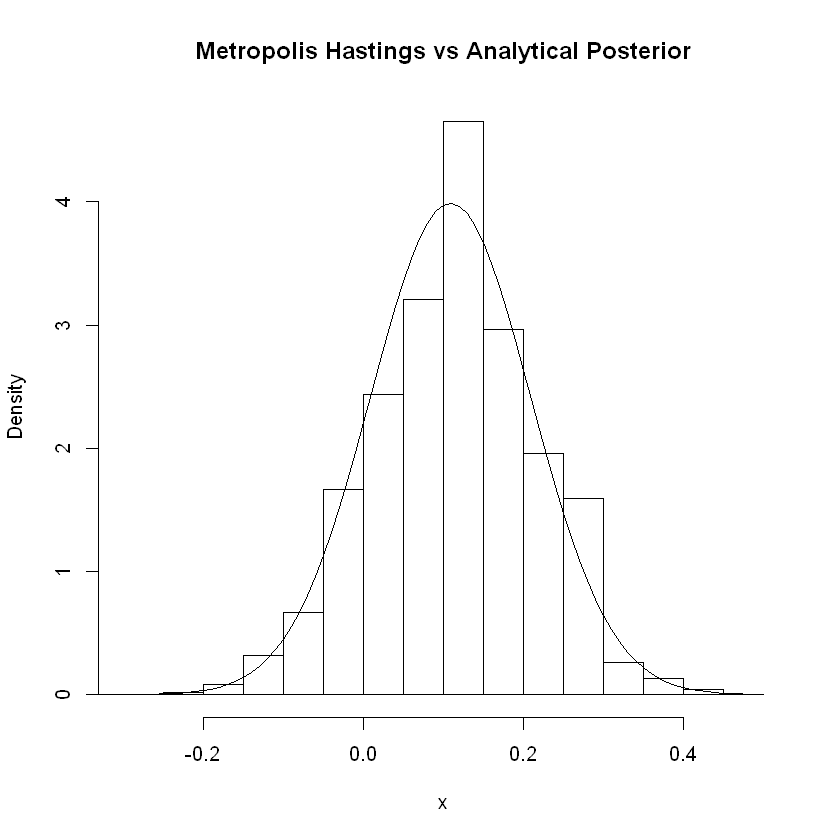

In [5]:
hist(nn_mh$samples[[1]][101:S, ], probability = TRUE, 
     main = "Metropolis Hastings vs Analytical Posterior", xlab = "x", breaks = 25)
plot_grid <- seq(-.5, .5, .01)
lines(plot_grid, dnorm(plot_grid, mean(x), sqrt(1 / n)))

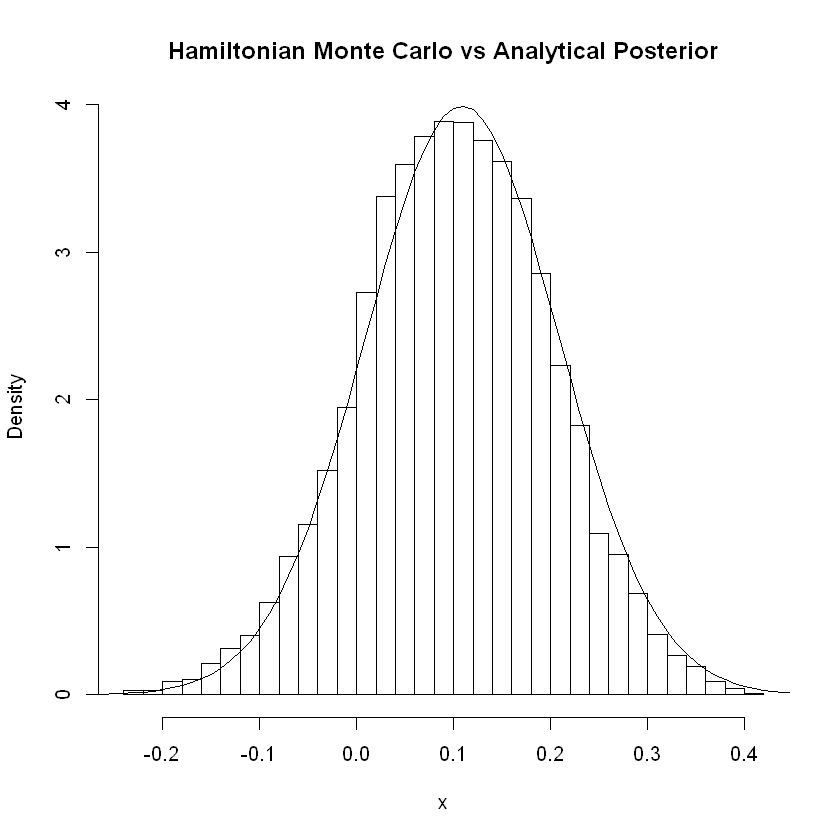

In [6]:
hist(nn_hmc$samples[101:S,], probability = TRUE, 
     main = "Hamiltonian Monte Carlo vs Analytical Posterior", xlab = "x", breaks = 25)
plot_grid <- seq(-.5, .5, .01)
lines(plot_grid, dnorm(plot_grid, mean(x), sqrt(1 / n)))

In [7]:
sd(nn_mh$samples[[1]][101:S], na.rm = TRUE)
sd(nn_hmc$samples[101:S], na.rm = TRUE)

[1] 0.1008659

[1] 0.09851796

In [8]:
nn_mh$accept_rate
nn_hmc$accepts

[1] 0.2444

[1] 0.9998

In [16]:
effectiveSize(nn_hmc$samples[101:S])
effectiveSize(nn_mh$samples[[1]][101:S])

var1 
330.0398

var1 
824.802